### Team_Performance_Analytics

### 1. Read the data set, clean the data and prepare a final dataset to be used for analysis.

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib import cm
%matplotlib inline

#### Reading the  csv file

In [90]:
bb_data = pd.read_csv('Basketball.csv')
bb_data

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15


### - Data Preparation and Cleaning
   #### - Since Team 61 is new and has no record its better to drop the team for better analysis


In [91]:
bb_data1 = bb_data.drop([60], axis=0)
bb_data1.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
55,Team 56,1,35,38,8,11,19,36,55,-,-,2016_17,17
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15


#### - In the given Data set the value '-' may not be helpful during the analysis it is better to replace it with the null of 0.  

In [92]:
bb_data1[['TournamentChampion','Runner-up']] = bb_data1[['TournamentChampion','Runner-up']].replace(['-'],'0')
bb_data1

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939-40,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932-33,1


#### - In column, 'Team Launch' is not unform nor any one year as a lunch year. so we will consider the first year and replace it with first year

In [93]:
bb_data1 = bb_data1.replace({'1931to32':'1931','1940-41':'1940','1930-31':'1930','1934-35':'1934','1963-64':'1963',
                  '1974-75':'1974','1943-44':'1943','1977-78':'1977','1961-62':'1961','1935-36':'1935',
                 '1939-40':'1939','1987-88':'1987','1941-42':'1941','1991_92':'1991','2007-08':'2007',
                  '1932-33':'1932','1962-63':'1962','1994-95':'1994','1978-79':'1978','1971-72':'1971',
                  '1941to42':'1941','1963-64':'1963','1999to00':'1999','2014-15':'2014','1990-91':'1990',
                  '1939-40':'1939','1947-48':'1947','1996-97':'1996','1995-96':'1995','1945-46':'1945',
                  '1948-49':'1948','1953-54':'1953','1979-80':'1979','1929':'1929','1950-51':'1950',
                  '1944_45':'1944','2016_17':'2016','2009-10':'2009','1956-57':'1956','1951~52':'1951',
                  '1935-36':'1935','1955-56':'1956','1949_50':'1949','1933to34':'1993','1960-61':'1960',
                  '1951-52':'1951','1998-99':'1998','1941-42':'1941','1977-78':'1977','1959-60':'1959', 
                  '2004to05':'2004'
                 })
bb_data1

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1


In [94]:
bb_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 60 non-null     object
 1   Tournament           60 non-null     int64 
 2   Score                60 non-null     object
 3   PlayedGames          60 non-null     object
 4   WonGames             60 non-null     object
 5   DrawnGames           60 non-null     object
 6   LostGames            60 non-null     object
 7   BasketScored         60 non-null     object
 8   BasketGiven          60 non-null     object
 9   TournamentChampion   60 non-null     object
 10  Runner-up            60 non-null     object
 11  TeamLaunch           60 non-null     object
 12  HighestPositionHeld  60 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.6+ KB


#### - Most of the Data are Numeric excluding Team, So we convert the object type into integer type, by this the Data cleaning will be done.

In [95]:
#Converting the Object type to Integer type

bb_data1[["Score", "PlayedGames","WonGames","DrawnGames","LostGames","BasketScored","BasketGiven","TournamentChampion","Runner-up","TeamLaunch"]] = bb_data1[["Score", "PlayedGames","WonGames","DrawnGames","LostGames","BasketScored","BasketGiven","TournamentChampion","Runner-up","TeamLaunch"]].astype(str).astype(int)
bb_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 60 non-null     object
 1   Tournament           60 non-null     int64 
 2   Score                60 non-null     int32 
 3   PlayedGames          60 non-null     int32 
 4   WonGames             60 non-null     int32 
 5   DrawnGames           60 non-null     int32 
 6   LostGames            60 non-null     int32 
 7   BasketScored         60 non-null     int32 
 8   BasketGiven          60 non-null     int32 
 9   TournamentChampion   60 non-null     int32 
 10  Runner-up            60 non-null     int32 
 11  TeamLaunch           60 non-null     int32 
 12  HighestPositionHeld  60 non-null     int64 
dtypes: int32(10), int64(2), object(1)
memory usage: 4.2+ KB


### 2. Perform detailed statistical analysis and EDA
#### - Getting the description of the data for the better analysis of the data.

In [96]:
bb_data1.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1.45000,1.433333,1958.966667,7.050000
std,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,5.51554,4.574679,26.817631,5.315232
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,0.00000,0.000000,1929.000000,1.000000
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,0.00000,0.000000,1935.000000,3.000000
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,0.00000,0.000000,1951.000000,6.000000
75%,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,0.00000,0.000000,1978.250000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.00000,25.000000,2016.000000,20.000000


#### By the detailed description : 
- We can see that on an average 810 games have been played in one Tournament.
- Total of 89 tournament have been played till 2018
- The Oldest team lunch was in 1929, Newest team lunch was in 2016 and average team lunched was in 1951.

#### Team with the most wins :

In [97]:
Winner=bb_data1.groupby('Team').TournamentChampion.sum()
Winner.sort_values(ascending=False).head(9).reset_index(name='Championship Titles')

,Team,Championship Titles
0,Team 1,33
1,Team 2,25
2,Team 3,10
3,Team 5,8
4,Team 4,6
5,Team 8,2
6,Team 10,1
7,Team 11,1
8,Team 6,1


- Team with the most win is Team 1 follwed by Team 2 and Team 3, which are also the oldest Team in the tournament
- In total 8 teams have won the tournamwnt title.

#### Team with most Runner - Up

In [98]:
bb_data1.rename(columns={'Runner-up':'RunnerUp'}, inplace=True)
bb_data1.RunnerUp.nunique()

RunnerUP=bb_data1.groupby('Team').RunnerUp.sum()
RunnerUP.sort_values(ascending=False).head(9).reset_index(name='Championship Titles')

,Team,Championship Titles
0,Team 2,25
1,Team 1,23
2,Team 3,8
3,Team 5,7
4,Team 4,6
5,Team 11,5
6,Team 6,4
7,Team 8,3
8,Team 21,1


- Team with the most runner - up is 'Team 2' follwed by 'Team 1' and 'Team 3', which are again the oldest Team in the tournament.
- In total 8 teams that are runner - up the tournamwnt title.
- Intrestingly 'Team 21' is the Newest team and have been runner up in one of the tour, it could be the potential newest team to look into

### Finding Corellation between the parameters  

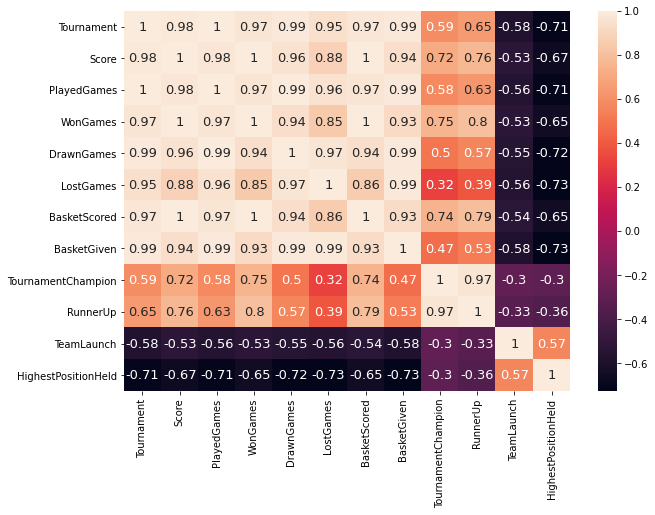

In [99]:
corr = bb_data1.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True ,annot_kws={'size': 13});

- By drawing the corelation we can see the least relation is between the Highest position held and the team lunched, and other all factors have atleast few corelatable stats.
- We can conclude that the Oldest team and the Position held need not to be a parameter to decide the successful club.

# Normalizing 
#### The need of this is because most of the clubs are lunched in different year, Heace it gives them an advantage of playing most of the games, and also winning the tournament. We normalize this by :  
- Average score by taking the ratio of basket scroe upon the game played.
- Average given by taking the ratio of basket given upon the game played.
- Then taking the ratio of average score and average given which will give us the clear view on the score that have been scored in winning cause or lossing cause.
- Percentage of winning by taking the ratio of game won and game lost.

In [100]:
bb_data1['PercentWin'] = (bb_data1['WonGames'] / bb_data1['PlayedGames'])*100
bb_data1['Ave_Win_Per_Tour'] = (bb_data1['WonGames'] / bb_data1['Tournament'])
bb_data1['Ave_Score_Per_Game'] = (bb_data1["BasketScored"]/bb_data1['PlayedGames'])*100
bb_data1['Ave_Given_Per_Game'] = (bb_data1["BasketGiven"]/bb_data1['PlayedGames'])*100
bb_data1['Diff_Sco_Giv'] = (bb_data1["Ave_Score_Per_Game"]-bb_data1['Ave_Given_Per_Game'])
bb_data1

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,RunnerUp,TeamLaunch,HighestPositionHeld,PercentWin,Ave_Win_Per_Tour,Ave_Score_Per_Game,Ave_Given_Per_Game,Diff_Sco_Giv
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,59.630702,19.151163,215.314989,113.685735,101.629254
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,57.241130,18.383721,213.613324,112.744388,100.868936
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,47.475134,15.512500,173.450650,126.587605,46.863045
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,44.557057,14.475610,165.090090,130.217718,34.872372
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,43.772629,14.058140,167.668356,133.960898,33.707458
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,41.112957,13.561644,152.823920,140.074751,12.749169
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3,36.100533,11.560976,137.433359,148.095963,-10.662605
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,37.532580,12.342857,140.225891,140.312772,-0.086881
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2,35.146022,12.034483,135.095670,143.353474,-8.257805
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1,35.069444,11.882353,124.942130,144.212963,-19.270833


#### - Aggregating the new data calulated in a table.

In [101]:
bb_data2 = bb_data1[['TeamLaunch','Team','Ave_Score_Per_Game','Ave_Given_Per_Game','Ave_Win_Per_Tour','PercentWin','HighestPositionHeld','Diff_Sco_Giv']].copy()
bb_data2

,TeamLaunch,Team,Ave_Score_Per_Game,Ave_Given_Per_Game,Ave_Win_Per_Tour,PercentWin,HighestPositionHeld,Diff_Sco_Giv
0,1929,Team 1,215.314989,113.685735,19.151163,59.630702,1,101.629254
1,1929,Team 2,213.613324,112.744388,18.383721,57.241130,1,100.868936
2,1929,Team 3,173.450650,126.587605,15.512500,47.475134,1,46.863045
3,1931,Team 4,165.090090,130.217718,14.475610,44.557057,1,34.872372
4,1929,Team 5,167.668356,133.960898,14.058140,43.772629,1,33.707458
5,1934,Team 6,152.823920,140.074751,13.561644,41.112957,1,12.749169
6,1929,Team 7,137.433359,148.095963,11.560976,36.100533,3,-10.662605
7,1929,Team 8,140.225891,140.312772,12.342857,37.532580,1,-0.086881
8,1939,Team 9,135.095670,143.353474,12.034483,35.146022,2,-8.257805
9,1932,Team 10,124.942130,144.212963,11.882353,35.069444,1,-19.270833


#### Checking for the overall tournament Percentage win of all the Teams

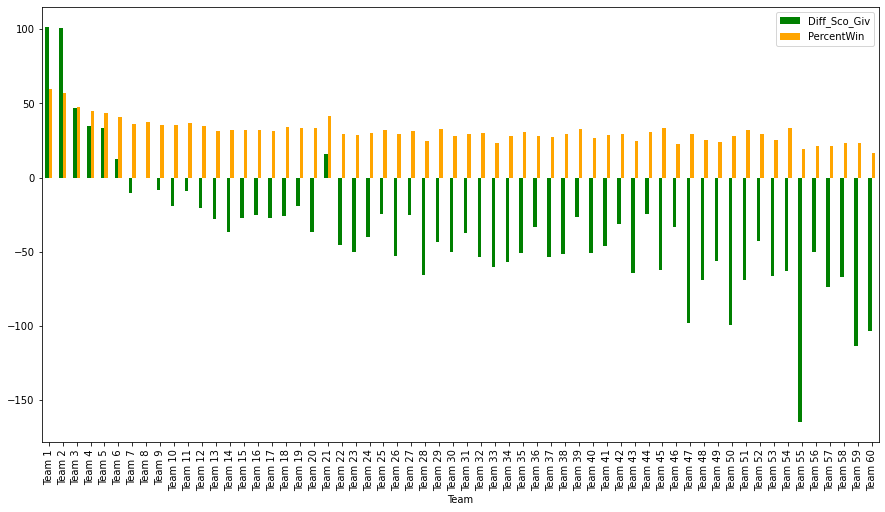

In [102]:
bb_data1.plot(x = 'Team', y = ['Diff_Sco_Giv','PercentWin'],kind = 'bar',figsize=(15,8),color=['green','orange']);

In [103]:
Overall=bb_data2.groupby('Team').PercentWin.sum()
Winner.sort_values(ascending=False).head(10).reset_index(name='Winning Percentage')

,Team,Winning Percentage
0,Team 1,33
1,Team 2,25
2,Team 3,10
3,Team 5,8
4,Team 4,6
5,Team 8,2
6,Team 10,1
7,Team 11,1
8,Team 6,1
9,Team 49,0


- The above table gives us clear insight of which team has most Winning percent in the whole tournament.
- We can see that Older team has the most winning Percent.

- Looking into the Histogram for better view on age of the Team.

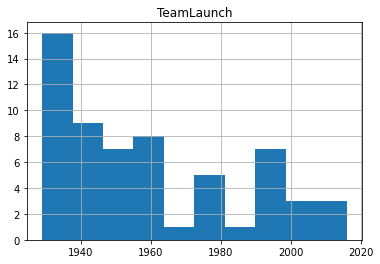

In [104]:
bb_data1.hist(column='TeamLaunch');
#sns.boxplot(x="Team", y="TeamLaunch", data=bb_data1);

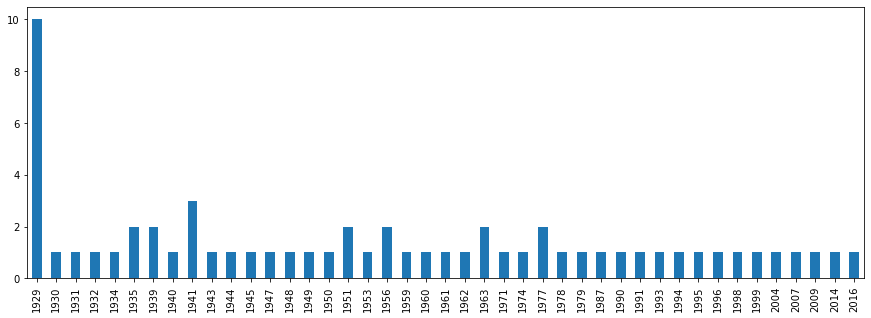

In [105]:
color = cm.inferno_r(np.linspace(.5, .5, 10))
bb_data1['TeamLaunch'].value_counts().sort_index(ascending=True).plot(kind = 'bar',figsize=(15,5));

- Most of the teams have been lunched before or on 1960. we will consider the team from 1978.
### Succesfull Oldest team before 1978

In [106]:
old_team = bb_data2.loc[bb_data1['TeamLaunch'] <= 1978]
old_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 59
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TeamLaunch           45 non-null     int32  
 1   Team                 45 non-null     object 
 2   Ave_Score_Per_Game   45 non-null     float64
 3   Ave_Given_Per_Game   45 non-null     float64
 4   Ave_Win_Per_Tour     45 non-null     float64
 5   PercentWin           45 non-null     float64
 6   HighestPositionHeld  45 non-null     int64  
 7   Diff_Sco_Giv         45 non-null     float64
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 3.0+ KB


- In Total, 45 teams were Luched before 1978.

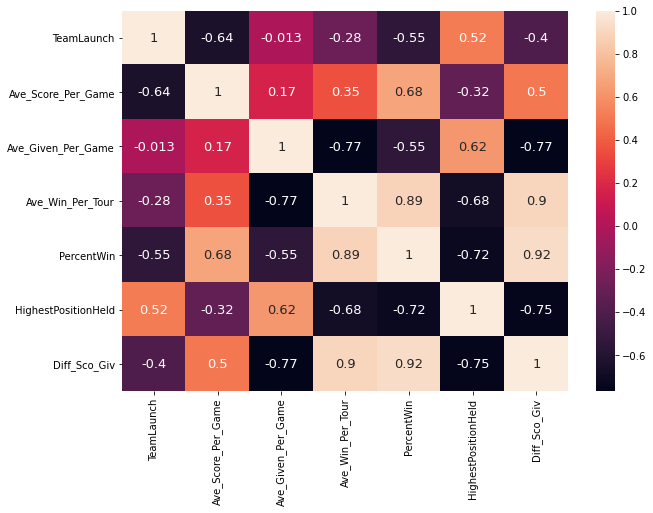

In [107]:
corr = old_team.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True ,annot_kws={'size': 13});

- By the Corelation data we can see that greatter the diffence in basket score and the given basket, and Percentage win has very close ralation.

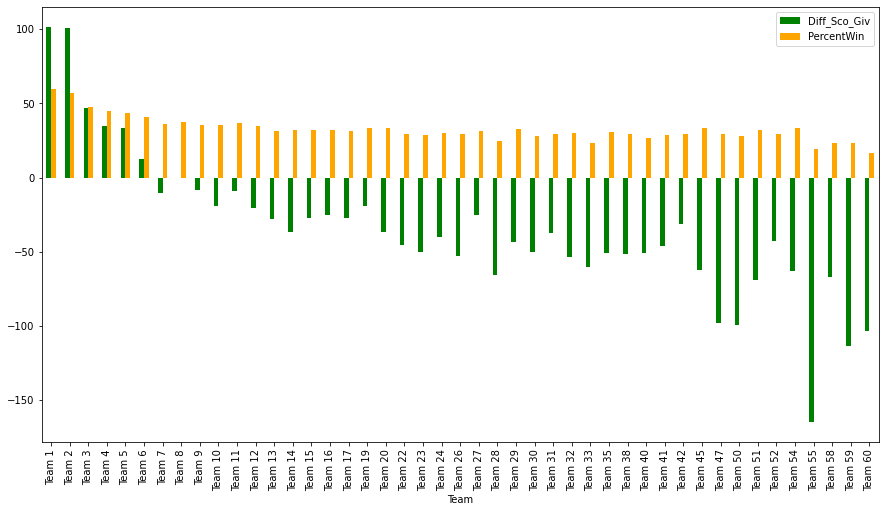

In [108]:
old_team.plot(x = 'Team', y = ['Diff_Sco_Giv','PercentWin'],kind = 'bar',figsize=(15,8),color=['green','orange']);

In [109]:
Winner=old_team.groupby('Team').PercentWin.sum()
Winner.sort_values(ascending=False).head(10).reset_index(name='Winning Percentage')

,Team,Winning Percentage
0,Team 1,59.630702
1,Team 2,57.241130
2,Team 3,47.475134
3,Team 4,44.557057
4,Team 5,43.772629
5,Team 6,41.112957
6,Team 8,37.532580
7,Team 11,36.797386
8,Team 7,36.100533
9,Team 9,35.146022


In [110]:
Winner=old_team.groupby('Team').Diff_Sco_Giv.sum()
Winner.sort_values(ascending=False).head(10).reset_index(name='Scored - Given')

,Team,Scored - Given
0,Team 1,101.629254
1,Team 2,100.868936
2,Team 3,46.863045
3,Team 4,34.872372
4,Team 5,33.707458
5,Team 6,12.749169
6,Team 8,-0.086881
7,Team 9,-8.257805
8,Team 11,-8.888889
9,Team 7,-10.662605


#### -    If Company’s management wants to invest in some of the best teams in the league it would be 'Team 1', 'Team 2', 'Team 3', 'Team 4' and 'Team 5'. But some of the older teams are already in contract with competitors, now lets look into the Newer team.

#### Considering new teams from 1978

In [111]:
new_team = bb_data2.loc[bb_data1['TeamLaunch'] >= 1978]
new_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 17 to 56
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TeamLaunch           16 non-null     int32  
 1   Team                 16 non-null     object 
 2   Ave_Score_Per_Game   16 non-null     float64
 3   Ave_Given_Per_Game   16 non-null     float64
 4   Ave_Win_Per_Tour     16 non-null     float64
 5   PercentWin           16 non-null     float64
 6   HighestPositionHeld  16 non-null     int64  
 7   Diff_Sco_Giv         16 non-null     float64
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 1.1+ KB


In [112]:
new_team

,TeamLaunch,Team,Ave_Score_Per_Game,Ave_Given_Per_Game,Ave_Win_Per_Tour,PercentWin,HighestPositionHeld,Diff_Sco_Giv
17,1993,Team 18,137.751678,163.674497,10.736842,34.228188,3,-25.922819
20,1998,Team 21,138.080495,122.136223,15.647059,41.176471,2,15.944272
24,2004,Team 25,114.035088,138.815789,12.250000,32.236842,6,-24.780702
33,1987,Team 34,84.104046,141.329480,10.666667,27.745665,7,-57.225434
35,1991,Team 36,118.518519,151.851852,10.857143,28.148148,7,-33.333333
36,2007,Team 37,107.017544,160.526316,10.333333,27.192982,8,-53.508772
38,1994,Team 39,124.375000,150.625000,13.000000,32.500000,10,-26.250000
39,1978,Team 40,108.602151,159.139785,10.000000,26.881720,8,-50.537634
42,1999,Team 43,101.973684,166.447368,9.250000,24.342105,17,-64.473684
43,2014,Team 44,121.929825,146.491228,11.666667,30.701754,10,-24.561404


#### - 16 New Teams
#### - Finding Corelation 

<AxesSubplot:>

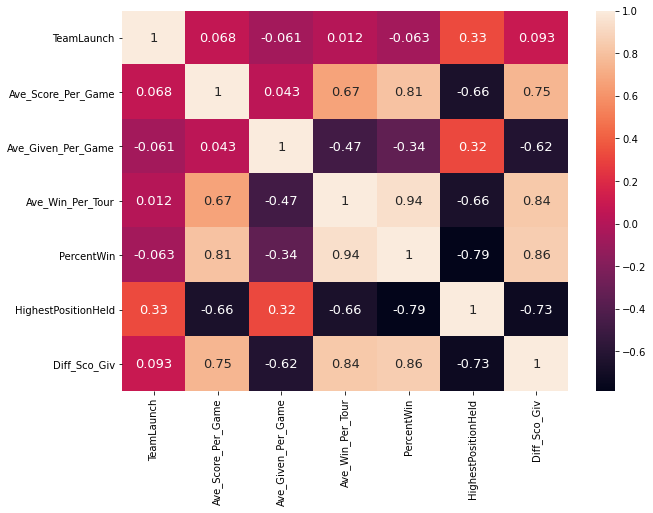

In [113]:
corr = new_team.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True ,annot_kws={'size': 13})

- Average win, Percentage win and Diffence of scored and given basket have a relation. Team Lunch and Other Parameter do not have relation

- Still their is very strong relation between Diff_Sco_Giv and percentage win

#### Further Analysing 

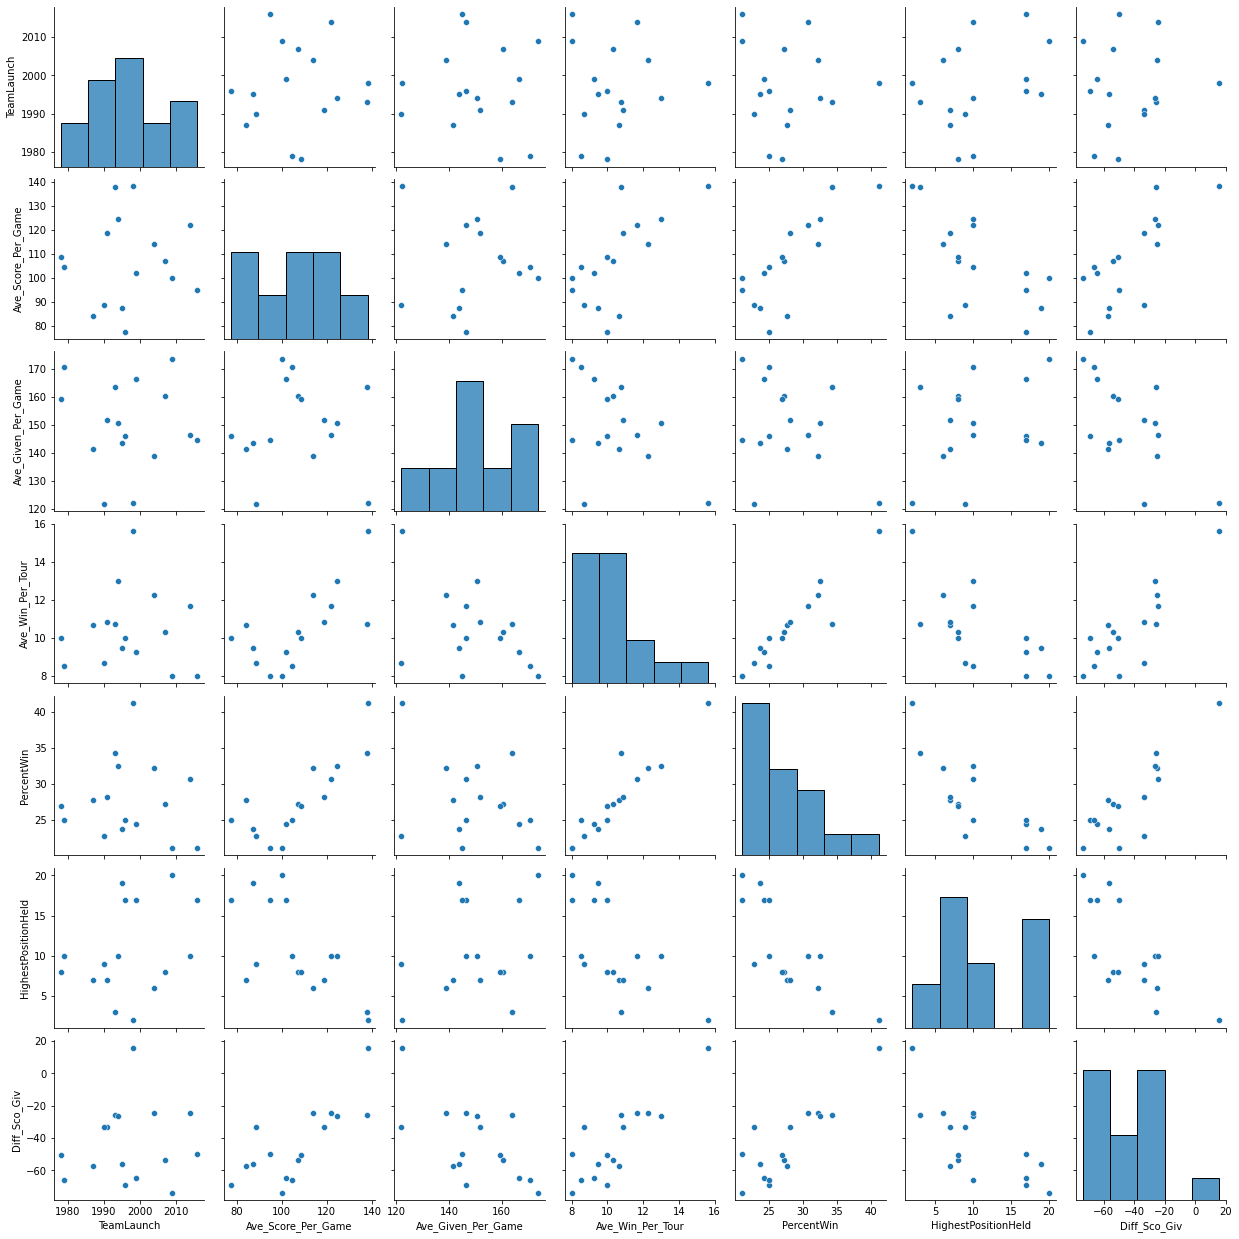

In [114]:
sns.pairplot(new_team)

- Again their is very storng relation between Diff_Sco_Giv and percentage win

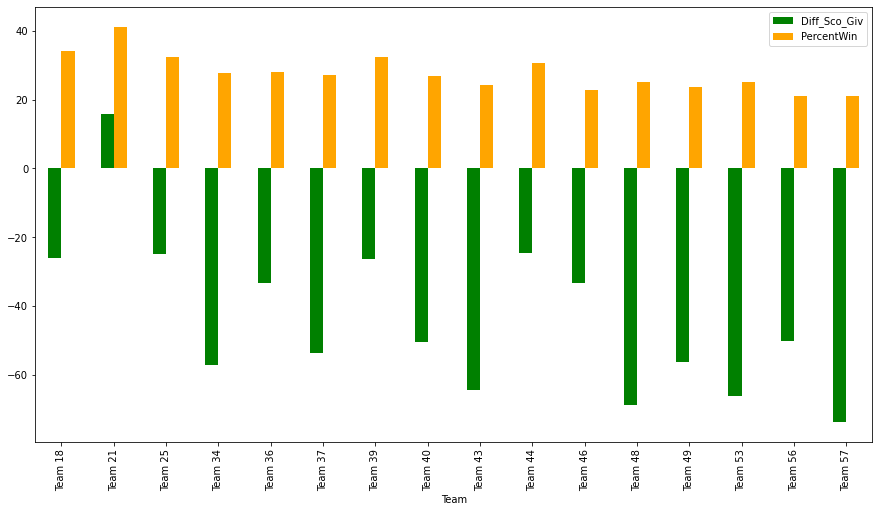

In [115]:
new_team.plot(x = 'Team', y = ['Diff_Sco_Giv','PercentWin'],kind = 'bar',figsize=(15,8),color=['green','orange']);

-  The Graph shows us that greater the differnce in the Basket score and Basket given, tends to have most percentage win in the Tour
-  Team 21 looks to score most basket in the Winning Cause

In [116]:
# Successful Newest CLub 

new_team1 = new_team.groupby('Team').PercentWin.sum()
new_team1.sort_values(ascending = False).head().reset_index(name='Percent WIN')

,Team,Percent WIN
0,Team 21,41.176471
1,Team 18,34.228188
2,Team 39,32.500000
3,Team 25,32.236842
4,Team 44,30.701754


- 'Team 21' is the newer team that has a good stat on winning the game.

In [117]:
new_team1 = new_team.groupby('Team').Diff_Sco_Giv.sum()
new_team1.sort_values(ascending = False).head().reset_index(name='Scored - Given')

,Team,Scored - Given
0,Team 21,15.944272
1,Team 44,-24.561404
2,Team 25,-24.780702
3,Team 18,-25.922819
4,Team 39,-26.250000


In [118]:
21,44,25,18,39,46

(21, 44, 25, 18, 39, 46)

## Final Suggestion to the management
### Final suggestion to the Company’s management:

-	As the Company’s management wants to invest in the best team in the tournament then they should approach ‘Team 1’, ‘Team 2’, ‘Team 3’, ’Team 4’, ‘Team 5’. 
-	Since, this are the oldest team and already in contract. The newer teams to invest would be ‘Team 21’, ‘Team 44’, ‘Team 25’ ‘Team 18’ and ‘Team 39’.

### Reason for selecting this teams: 
-	In the analysis, we have found that this teams have more winning percentage in the tournament.
-	The Greater the difference in Basket scored to the given can determine that how promising the team is and also the team is promising.
-	This difference can also give an indication of the higher probability of winning the draw match.


### Improvements or suggestion to the association management on the data points collected.

#### Quality of the data:
-	The data looks good all of them were used for the analysis and no major correction were needed nor the data were imbalance.

#### Quantity of the data:
-	The data quality could be much better, if the most recent performance of each team could be available.
       - For example: Rank of each team in each year, Basket scored in each Tournament etc. by which few more insight could be drawn and be used for better analysis.
3V’s of the data:
-	Volume is acceptable as most of the data was utilized and not major changes were done.
-	In terms of Velocity and Variety of the data, we cannot suggest much as the data is not generate in real-time nor it was unstructured or were Human or Machine generated data.

#### Few more suggestion on data collection.
- It would be good if the data are more recent and detailed, as management need to invest in the newer team.
- Tour by Tour data could help us even more in the analysis, as well as the player details and age.
- Players and the coach detail could help us even more to extract more insight.  
